In [1]:
def evaluate(truepositive, truenegative, falsepositive, falsenegative, beta=1):
    if truenegative + truepositive + falsenegative + falsepositive == 0:
        accuracy = 0/1
    else:
        accuracy = (truenegative + truepositive)/(truenegative + truepositive + falsenegative + falsepositive)
    
    if truepositive+falsepositive == 0:
        precision = 0/1
    else:
        precision = truepositive/(truepositive+falsepositive)
    
    if truepositive+falsenegative == 0:
        recall = 0/1
    else:
        recall = truepositive/(truepositive+falsenegative)
    if precision+recall == 0:
        f = 0/1
    else:
        f = (1+beta**2) * (((precision*beta**2)*recall)/(precision+recall))
    
    return f, accuracy, precision, recall

In [2]:
def testing(vectorizer, model, zeilen=10000):
    with open('test.csv', encoding='utf-8') as csvdatei:
        csv_reader_object = csv.reader(csvdatei)
        zeile = 1;
        truepositive = 0
        truenegative = 0
        falsepositive = 0
        falsenegative = 0

        alle = []

        for row in csv_reader_object:
            if zeile < zeilen:
                rate = 0
                if int(row[0]) == 2:
                    rate = 1
                elif int(row[0]) == 1:
                    rate = -1
                new_text = [row[1] + ". " + row[2]]
                new_X = vectorizer.transform(new_text)
                rating = model.predict(new_X)
                if rating[0] == 1:
                    rating = 1
                else:
                    rating = -1
                if rate == rating:
                    if rate == 1:
                        truepositive+=1
                        alle.append(1)
                    elif rate == -1:
                        truenegative += 1
                        alle.append(1)
                else: 
                    if rate == 1:
                        falsepositive+=1
                        alle.append(-1)
                    elif rate == -1:
                        falsenegative += 1
                        alle.append(-1)
                zeile +=1
        return evaluate(truepositive, truenegative, falsepositive, falsenegative, 1), truepositive, truenegative, falsepositive, falsenegative

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import csv
import time

zeile = 0
texts = []
labels = []
learningcurve = []

start = time.time()
with open('train.csv', encoding='utf-8') as csvdatei:
    csv_reader_object = csv.reader(csvdatei)
    zeile = 0;
    gespeichert = 0
    for row in csv_reader_object:
        rate = 0
        if int(row[0]) == 2:
            rate = 1
        elif int(row[0]) == 1:
            rate = -1
        texts.append(row[1] + ". " + row[2])
        labels.append(rate)
         
        zeile+=1
        
        if zeile % 50000 == 0 and zeile != 0:
            print("Zeile: " + str(zeile) + " Insgesamt: " + str(zeile))
            vectorizer = CountVectorizer()
            try:
                X = vectorizer.fit_transform(texts)
                model.fit(X, labels)
            except:
                print("Fehler in Zeile " + str(zeile))
            learning = testing(vectorizer, model)
            print(learning)
            learningcurve.append(learning)
ende = time.time()
timetrainwithcurve = '{:5.3f}s'.format(ende-start)

Zeile: 50000 Insgesamt: 50000
((0.8498459703865646, 0.8488848884888489, 0.834504293520687, 0.8657623000607411), 4276, 4212, 848, 663)
Zeile: 100000 Insgesamt: 100000
((0.8585298196948683, 0.8571857185718572, 0.8456284153005464, 0.8718309859154929), 4333, 4238, 791, 637)
Zeile: 150000 Insgesamt: 150000
((0.8556107249255213, 0.8545854585458545, 0.8407494145199064, 0.8710068742418116), 4308, 4237, 816, 638)
Zeile: 200000 Insgesamt: 200000
((0.8567731661192396, 0.8560856085608561, 0.839968774395004, 0.8742636603696933), 4304, 4256, 820, 619)
Zeile: 250000 Insgesamt: 250000
((0.855720402270238, 0.8550855085508551, 0.8386026541764247, 0.87355153486481), 4297, 4253, 827, 622)
Zeile: 300000 Insgesamt: 300000
((0.8544190665342603, 0.8533853385338533, 0.8395784543325527, 0.8697937727456531), 4302, 4231, 822, 644)
Zeile: 350000 Insgesamt: 350000
((0.8570577724836211, 0.855985598559856, 0.8425058548009368, 0.8721212121212121), 4317, 4242, 807, 633)
Zeile: 400000 Insgesamt: 400000
((0.8578790882061

Zeile: 3050000 Insgesamt: 3050000
((0.8601541914706743, 0.8566856685668567, 0.8600702576112412, 0.8602381417138395), 4407, 4159, 717, 716)
Zeile: 3100000 Insgesamt: 3100000
((0.8599570899161303, 0.8563856385638564, 0.8604605776736924, 0.8594541910331384), 4409, 4154, 715, 721)
Zeile: 3150000 Insgesamt: 3150000
((0.8598732325694785, 0.8562856285628563, 0.8604605776736924, 0.8592866887546288), 4409, 4153, 715, 722)
Zeile: 3200000 Insgesamt: 3200000
((0.8598440545808967, 0.8561856185618562, 0.8608508977361436, 0.8588395638629284), 4411, 4150, 713, 725)
Zeile: 3250000 Insgesamt: 3250000
((0.8603177697631349, 0.8566856685668567, 0.8612412177985949, 0.859396299902629), 4413, 4153, 711, 722)
Zeile: 3300000 Insgesamt: 3300000
((0.8599551700613975, 0.8562856285628563, 0.8610460577673692, 0.8588670430212186), 4412, 4150, 712, 725)
Zeile: 3350000 Insgesamt: 3350000
((0.8595927116827439, 0.8558855885588559, 0.8608508977361436, 0.8583381980930143), 4411, 4147, 713, 728)
Zeile: 3400000 Insgesamt: 34

In [4]:
ev = testing(vectorizer, model, zeilen=400000)

MultinomialNB Modell trainiert:


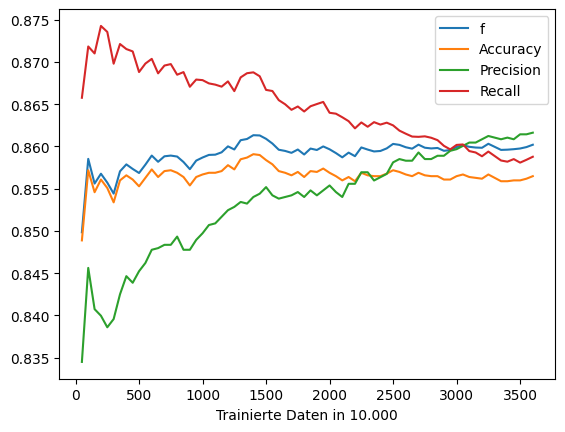

Time: 10966.735s
Accuracy: 0.8530196325490814
Precision: 0.835375
Recall: 0.8659338039410808
F: 0.8503799542935089
True positive: 167075
True negative: 174132
False positive: 32925
False negative: 25867


In [5]:
from matplotlib import pyplot as plt
f = []
accuracy = []
recall = []
precision = []
x = []
z = 0
for y in learningcurve:
    z+=50
    x.append(z)
print("MultinomialNB Modell trainiert:")
for a in range(len(learningcurve)):
    f.append(learningcurve[a][0][0])
    accuracy.append(learningcurve[a][0][1])
    recall.append(learningcurve[a][0][3])
    precision.append(learningcurve[a][0][2])
plt.plot(x, f, label="f")
plt.plot(x, accuracy, label="Accuracy")
plt.plot(x, precision, label="Precision")
plt.plot(x, recall, label="Recall")
plt.legend(loc="best")
plt.xlabel("Trainierte Daten in 10.000")
plt.show()

print("Time: " + str(timetrainwithcurve))

print("Accuracy: " + str(ev[0][1]))
print("Precision: " + str(ev[0][2]))
print("Recall: " + str(ev[0][3]))
print("F: " + str(ev[0][0]))

print("True positive: " + str(ev[1]))
print("True negative: " + str(ev[2]))
print("False positive: " + str(ev[3]))
print("False negative: " + str(ev[4]))

Time: 11314.689s
Accuracy: 0.8530196325490814
Precision: 0.835375
Recall: 0.8659338039410808
F: 0.8503799542935089

True positive: 167075
True negative: 174132
False positive: 32925
False negative: 25867

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import accuracy_score
import csv

zeile = 0
texts = []
labels = []

start = time.time()
with open('train.csv', encoding='utf-8') as csvdatei:
    csv_reader_object = csv.reader(csvdatei)
    zeile = 0;
    gespeichert = 0
    for row in csv_reader_object:
        rate = 0
        if int(row[0]) == 2:
            rate = 1
        elif int(row[0]) == 1:
            rate = -1
        texts.append(row[1] + ". " + row[2])
        labels.append(rate)
         
        zeile+=1
        
        if zeile % 50000 == 0 and zeile != 0:
            print("Zeile: " + str(zeile) + " Insgesamt: " + str(zeile))
            vectorizer = CountVectorizer()
            try:
                X = vectorizer.fit_transform(texts)
                
                model = MultinomialNB()
                model.fit(X, labels)
            except:
                print("Fehler in Zeile " + str(zeile))
            learning = testing(vectorizer, model)
            print(learning)
            learningcurve.append(learning)
ende = time.time()
timetrainwithcurve = '{:5.3f}s'.format(ende-start)

TypeError: list indices must be integers or slices, not str

In [7]:
ev = testing(vectorizer, model, zeilen=400000)

In [8]:
print("Tree Modell trainiert:")

print("Time: " + str(timetrainwithcurve))

print("Accuracy: " + str(ev[0][1]))
print("Precision: " + str(ev[0][2]))
print("Recall: " + str(ev[0][3]))
print("F: " + str(ev[0][0]))

print("True positive: " + str(ev[1]))
print("True negative: " + str(ev[2]))
print("False positive: " + str(ev[3]))
print("False negative: " + str(ev[4]))

Tree Modell trainiert:
Time: 21.908s
Accuracy: 0.8530196325490814
Precision: 0.835375
Recall: 0.8659338039410808
F: 0.8503799542935089
True positive: 167075
True negative: 174132
False positive: 32925
False negative: 25867
